In [47]:
import re
from datetime import datetime
from clickhouse_driver import Client
import random
import pandas as pd
import dask
import dask.dataframe as dd
from dask.delayed import delayed
import glob
from multiprocessing import Pool
import os
import pandas as pd
import dask.dataframe as dd
import numpy as np
import random
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
%matplotlib inline


In [46]:
!pip install GridSearch

  ERROR: Could not find a version that satisfies the requirement GridSearch (from versions: none)
ERROR: No matching distribution found for GridSearch


In [2]:
train=pd.read_csv('train.csv') 
test=pd.read_csv('test.csv') 

In [6]:
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [5]:
print(test)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [4]:
print(gender)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [4]:
train['Family'] = train.Parch + train.SibSp

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
dtype: int64

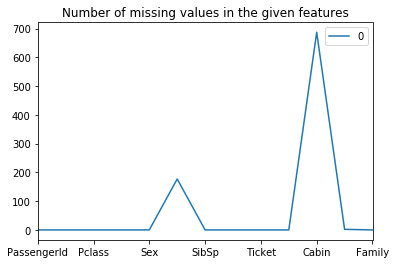

In [6]:
pd.DataFrame(train.isnull().sum()).plot.line().set_title("Number of missing values in the given features")
train.isnull().sum()

Text(0.5, 1, 'Missing values heatmap')

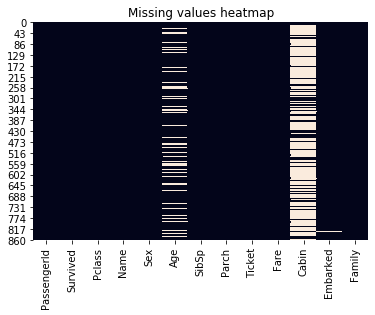

In [16]:
sns.heatmap(train.isnull(), cbar = False).set_title("Missing values heatmap")


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
dtype: int64

In [8]:
train.Embarked.fillna(train.Embarked.mode()[0], inplace = True)

In [26]:
train_.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
Family    0
dtype: int64

In [27]:
train.Cabin = train.Cabin.fillna('LS')

In [9]:
train['Age']=train['Age'].fillna(train['Age'].mean())

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family           0
dtype: int64

In [11]:
train['Sex'] = LabelEncoder().fit_transform(train['Sex'])

In [49]:
train_=train[['Pclass','Sex','Age','Fare','Family']]

In [63]:
train_['Age']=train_['Age']/train_['Age'].max()

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
train_['Fare']=train_['Fare']/train_['Fare'].max()

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
train_

,Pclass,Sex,Age,Fare,Family
0,3,1,0.275000,0.014151,1
1,1,0,0.475000,0.139136,1
2,3,0,0.325000,0.015469,0
3,1,0,0.437500,0.103644,1
4,3,1,0.437500,0.015713,0
...,...,...,...,...,...
886,2,1,0.337500,0.025374,0
887,1,0,0.237500,0.058556,0
888,3,0,0.371239,0.045771,3
889,1,1,0.325000,0.058556,0


In [50]:
y=train['Survived']

In [16]:
linear= LinearRegression()

In [17]:
linear.fit(train_, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_new = linear.predict(train_)

In [22]:
mean_squared_error(y, y_new)

0.14323782102214655

In [42]:
train_,y = make_classification(n_samples=1000,n_features=5, n_informative=5,n_redundant=0,
                        random_state=0, shuffle=False)
regr = RandomForestClassification(max_depth=3, random_state=0)
regr.fit(train_, y)

NameError: name 'RandomForestClassification' is not defined

In [30]:
print(regr.feature_importances_)

[0.02611195 0.42860288 0.02848338 0.49042571 0.02637608]


In [39]:
y_new=regr.predict(train_)

In [40]:
np.mean((y-y_new)**2)

0.054206835961332786

In [48]:
C = 1e-2

In [51]:
logit = LogisticRegression(C=C)
logit.fit(train_, y)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
round(logit.score(train_, y), 3)

0.712

In [55]:
C = 1
logit = LogisticRegression(C=C)
logit.fit(train_, y)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
round(logit.score(train_, y), 3)

0.8

In [57]:
skf = StratifiedKFold(n_splits=5)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf)
logit_searcher.fit(train_, y)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='warn',
                     n_jobs=None, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [58]:
round(logit_searcher.score(train_, y), 3)

0.8

In [62]:
forest = RandomForestClassifier(n_estimators=200)
forest.fit(train_, y)
print(round(forest.score(train_ ,y), 3))

0.982


In [67]:
C = 1                                        # После того, как отмасштабировал Fare and Age
logit = LogisticRegression(C=C)
logit.fit(train_, y)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
round(logit.score(train_, y), 3)

0.8

In [69]:
forest = RandomForestClassifier(n_estimators=200) # После того, как отмасштабировал Fare and Age
forest.fit(train_, y)
print(round(forest.score(train_ ,y), 3))

0.982


In [70]:
train_

,Pclass,Sex,Age,Fare,Family
0,3,1,0.275000,0.014151,1
1,1,0,0.475000,0.139136,1
2,3,0,0.325000,0.015469,0
3,1,0,0.437500,0.103644,1
4,3,1,0.437500,0.015713,0
...,...,...,...,...,...
886,2,1,0.337500,0.025374,0
887,1,0,0.237500,0.058556,0
888,3,0,0.371239,0.045771,3
889,1,1,0.325000,0.058556,0
